<a href="https://colab.research.google.com/github/Matceo/SyS./blob/main/SLIT./S%26S%3ARespuestaImpulso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

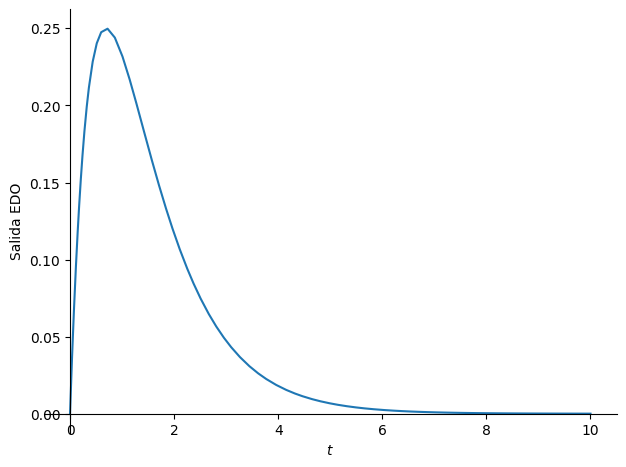

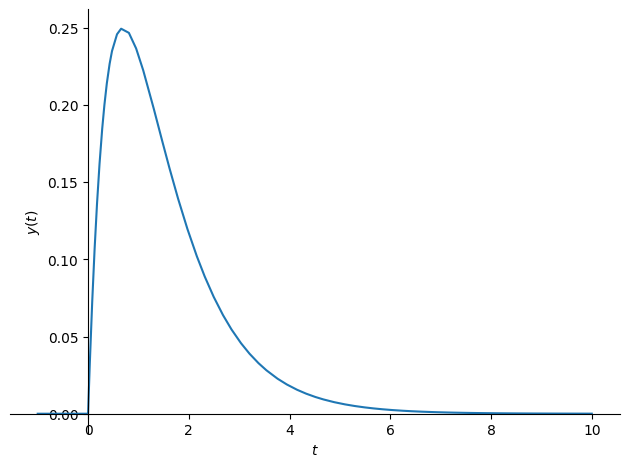

In [18]:
#Ejercicio1

%matplotlib inline
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

t=sym.symbols('t', real=True)
x=sym.Function('x')(t)
y=sym.Function('y')(t)
ode=sym.Eq(y+y.diff(t), x)
solution=sym.dsolve(ode.subs(x, sym.exp(-2*t)*sym.Heaviside(t)))
integration_constants=sym.solve((solution.rhs.limit(t, 0, '-'), solution.rhs.diff(t).limit(t, 0, '-')), 'C1')
y1=solution.subs(integration_constants)
h=sym.Function('h')(t)
solution2=sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, h))
integration_constants=sym.solve((solution2.rhs.limit(t, 0, '-'), solution2.rhs.diff(t).limit(t, 0, '-')), 'C1')
h=solution2.subs(integration_constants)
tau=sym.symbols('tau', real=True)
y2=sym.integrate(sym.exp(-2*tau)*h.rhs.subs(sym.Heaviside(t), 1).subs(t, t-tau), (tau, 0, t))
sym.plot(y2, (t, 0, 10), ylabel='Salida EDO')
sym.plot(y1.rhs, (t, -1, 10), ylabel=r'$y(t)$')